# Classification with Logistic Regression and SVM

We will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). We'll be trying to predict a classification: survival or deceased.

 - **Variable Name -  Variable Description**
 - PassengerID - Passenger ID          
 - Survived - Survival (0 = No; 1 = Yes)
 - Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
 - Name	- Name
 - Sex - Sex
 - Age - Age in years
 - SibSp - Number of Siblings/Spouses Aboard
 - Parch - Number of Parents/Children Aboard
 - Ticket - Ticket Number 
 - Fare - Passenger Fare
 - Cabin - Cabin number
 - Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

### a. Import Libraries

Import all necessary libraries


In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, auc,precision_recall_curve

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.calibration import CalibrationDisplay

import numpy as np

Our target variable will be **survived**.  Use the rest of the fields mentioned above to predict whether a passenger survived the Titanic shipwreck.

### b.	Data Loading / Preprocessing
#### i.	Loading
1. Load the data <df_train.csv> and <df_test.csv> as a pandas dataframe using the `pandas.read_csv` function. The ‘df_test.csv’ has been preprocessed (i.e., null values have been dropped, certain columns etc. have been dropped) and should not be changed apart from splitting the dataframe into X_test and y_test.  The ‘df_train’ data has NOT been preprocessed and you will need to preprocess and prepare the ‘df_train’ dataframe. Note: Neither df_train nor df_test have been scaled. The next few steps will enumerate data preprocessing, scaling requirements we need to perform.

In [164]:
train_data = pd.read_csv("df_train.csv")
test_data = pd.read_csv("df_test.csv")

2. The resulting dataframe (i.e., df_train) should have the shape (712,12) indicating that there are 712 instances and 12 columns.

In [165]:
print("train data shape:", train_data.shape)
print("test data shape:", test_data.shape)

train data shape: (712, 12)
test data shape: (179, 9)


3. In df_train dataframe, currently you have 12 columns which are the following – PassengerID, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked and the Survived column (target variable).

In [166]:
print(train_data.head())

   PassengerId  Pclass                                               Name  \
0          299       1                              Saalfeld, Mr. Adolphe   
1            9       3  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)   
2          414       2                     Cunningham, Mr. Alfred Fleming   
3          542       3               Andersson, Miss. Ingeborg Constanzia   
4          557       1  Duff Gordon, Lady. (Lucille Christiana Sutherl...   

      Sex   Age  SibSp  Parch  Ticket     Fare Cabin Embarked  Survived  
0    male   NaN      0      0   19988  30.5000  C106        S         1  
1  female  27.0      0      2  347742  11.1333   NaN        S         1  
2    male   NaN      0      0  239853   0.0000   NaN        S         0  
3  female   9.0      4      2  347082  31.2750   NaN        S         0  
4  female  48.0      1      0   11755  39.6000   A16        C         1  


4. Use the `pandas.isnull().sum()` function to check if there are any missing values in the df_train dataframe. Report which columns have missing (i.e., null) values and provide the number of the null values in the columns.

In [167]:
missing_data = train_data.isnull().sum()
print(missing_data)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            138
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          541
Embarked         2
Survived         0
dtype: int64


5. Use the `pandas.DataFrame.drop()` function to drop the ‘Cabin’, ‘PassengerID’, ‘Name’ and ‘Ticket’ columns. 

In [168]:
train_data = train_data.drop(columns=['Ticket', 'Cabin', 'PassengerId', 'Name'])
train_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,male,NaN,0,0,30.5000,S,1
1,3,female,27.0,0,2,11.1333,S,1
2,2,male,NaN,0,0,0.0000,S,0
3,3,female,9.0,4,2,31.2750,S,0
4,1,female,48.0,1,0,39.6000,C,1


6. Use the `pandas.DataFrame.fillna()` function to replace the NA values in the ‘Age’ column with the mean value of the ‘Age’ column. Note: This process is called **imputation** (i.e., filling null values with a pre-specified value) and we are employing one strategy called mean imputation, but other strategies can also be employed in general.  
Use the `dropna()` function to drop any remaining **rows** that consist of NA values.

In [169]:
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean())
train_data = train_data.dropna()
print(train_data.head())
print(train_data.shape)

   Pclass     Sex        Age  SibSp  Parch     Fare Embarked  Survived
0       1    male  29.811847      0      0  30.5000        S         1
1       3  female  27.000000      0      2  11.1333        S         1
2       2    male  29.811847      0      0   0.0000        S         0
3       3  female   9.000000      4      2  31.2750        S         0
4       1  female  48.000000      1      0  39.6000        C         1
(710, 8)


7. Your task is to use the feature columns to predict the target column. This can be cast as a classification problem.  
8. Create a pandas dataframe X_train of features (by dropping the ‘Survival’ column from the df_train dataframe). Create a pandas Series object of targets y_train (by only considering the ‘Survival’ column from the df_train dataframe). Moving forward, we will be working with X_train and y_train. At this point, also split the df_test into X_test and y_test by dropping the ‘Survival’ column and storing the features into X_test. Store the ‘Survival’ column in y_test.

In [170]:
X_train = train_data.drop(columns=['Survived'])
y_train = train_data['Survived']
X_test = test_data.drop(columns=['Survived'])
y_test = test_data['Survived']

#### ii. Data Visualization

1. Employ a scatter plot using `matplotlib.pyplot.scatter` between the age of the passengers and the price of their fare. Label the x-axis and the y-axis and also give the plot a title.

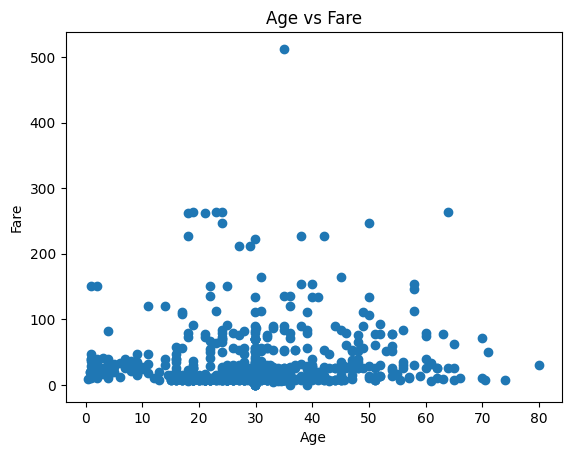

Max age:  80.0
Minimum Fare: 0.0
Max Fare: 512.3292
Mean Age: 29.75497865240222
Mean Fare: 32.52509295774648


In [171]:
plt.scatter(X_train['Age'], X_train['Fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare')
plt.show()
print("Max age: ", np.max(X_train['Age']))
print("Minimum Fare:", np.min(X_train['Fare']))
print("Max Fare:", np.max(X_train['Fare']))
print("Mean Age:", np.mean(X_train['Age']))
print("Mean Fare:", np.mean(X_train['Fare']))


2. Use the df_train dataframe. Using matplotlib visualize the number of males and females that survived and their respective passenger classes on two separate bar chart plots using `matplotlib.pyplot.bar` (Passenger Class column)

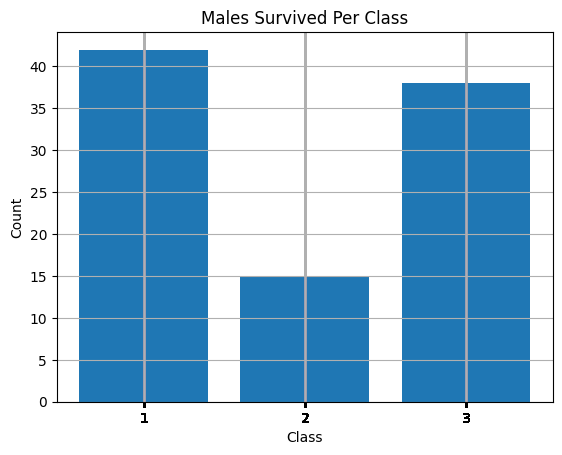

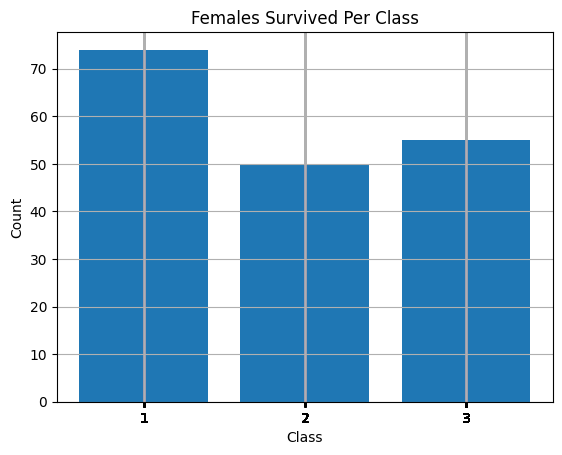

In [172]:
male_mask = X_train['Sex'] == 'male'
male = X_train[male_mask]
male_class = male['Pclass']
male_survived = (y_train[male_mask]).groupby(male_class).sum()

female_mask = X_train['Sex'] == 'female'
female = X_train[female_mask]
female_class = female['Pclass']
female_survived = (y_train[female_mask]).groupby(female_class).sum()

plt.figure()
plt.bar([1,2,3], male_survived)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Males Survived Per Class')
plt.xticks(male_class)
plt.grid()
plt.show()
plt.figure()
plt.bar([1,2,3], female_survived)
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(female_class)
plt.title('Females Survived Per Class')
plt.grid()
plt.show()


3. Using the Target variable (Survived) in y_train plot a bar chart showing the distribution of the ‘Survived’ column. 

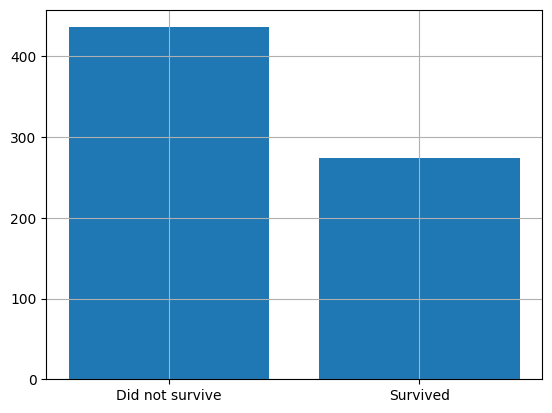

In [173]:
survived_counts = y_train.value_counts().sort_index()
plt.figure()
plt.bar(['Did not survive', 'Survived'], survived_counts)
plt.grid()
plt.show()

4. So far you should have successfully been able to load, preprocess and visualize your data. Use the `pd.get_dummies()` function to convert categorical data into dummy variables (‘Sex’ and ‘Embarked’). Make sure to pass `drop_first=True` to the `get_dummies()` function. (Perform this only on X_train and store the result back into X_train). 

In [174]:
#X_train.columns
X_train = pd.get_dummies(X_train, columns=['Sex', 'Embarked'], drop_first=True)
print(X_train.shape)
X_train.head()

(710, 8)


,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,29.811847,0,0,30.5000,True,False,True
1,3,27.000000,0,2,11.1333,False,False,True
2,2,29.811847,0,0,0.0000,True,False,True
3,3,9.000000,4,2,31.2750,False,False,True
4,1,48.000000,1,0,39.6000,False,False,False


#### iii. Data Scaling

1. Use MinMaxScaler to scale only the **continuous attributes** of X_train. Apply the `fit_transform()` function of the scaler to obtain the scaled data and store it back in X_train.

In [175]:
continuous_variables = ['Age', 'Fare']
scaler = MinMaxScaler()
X_train[continuous_variables] = scaler.fit_transform(X_train[continuous_variables])
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0.369337,0,0,0.059532,True,False,True
1,3,0.334004,0,2,0.021731,False,False,True
2,2,0.369337,0,0,0.000000,True,False,True
3,3,0.107816,4,2,0.061045,False,False,True
4,1,0.597889,1,0,0.077294,False,False,False


2. Scale the X_test using the scaler you have just fit, this time using the `transform()` function. Note: Store the scaled values back into X_test. At the end of this step, you must have X_train, X_test, all scaled according to the MinMaxScaler.

In [176]:
X_test[continuous_variables] = scaler.transform(X_test[continuous_variables])
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,2,0.623021,0,1,0.050749,0,0,1
1,1,0.547625,0,0,0.054107,0,0,0
2,3,0.362113,0,0,0.015379,0,1,0
3,3,0.057552,0,0,0.024350,0,0,1
4,2,0.258608,0,0,0.143462,1,0,1


### c. Modelling

#### i. Modelling (Model Instantiation / Training) using Logistic Regression classifier

1. Employ the Logistic Regression classifier from sklearn and instantiate the model. Label this model as ‘model_lr’  

In [177]:
model_lr = LogisticRegression()

2. Once instantiated, `fit()` the model using the scaled X_train, y_train data.

In [178]:
model_lr.fit(X_train, y_train)

LogisticRegression()

3. Employ the `predict()` function to obtain predictions on X_test and store this in a variable labeled as ‘y_pred_lr’.

In [179]:
y_pred_lr = model_lr.predict(X_test)

4. Employ the `accuracy_score` function by using the ‘y_pred_lr’ and ‘y_test’ variables as the functions parameters and print the accuracy of the Logistic Regression model. 

In [180]:
accuracy= accuracy_score(y_pred_lr, y_test)
print(accuracy)

0.8938547486033519


#### ii. Modelling Logistic Regression Classifier with the addition of noise on the target variable.

In the data repository you should see three noisy datasets – `df_train_noise20`, `df_train_noise40`, and `df_train_noise60`. These datasets have already been preprocessed. In each dataset `df_train_noise<integer>`, the integer indicates the percentage of noise injected into the target variable in that training set. The noise can be considered a result of incorrect class labelling of a particular instance. For example, in `df_train_noise20`, 20% of the instances have an incorrect target label in the training set. Our goal will be to train a set of classification models on such noisy training data and test on a clean test set (i.e., same as what we have been using so far `df_test`).

Load the `df_train_noise<nl>` (nl means noise level and is a place holder for the integer percentage) datasets and split the data into `X_train_<nl>` and `y_train_<nl>` (e.g., if working with `df_train_noise20` we would split the data and store it in variables named `X_train_20`, `y_train_20`). `X_train_<nl>` should store the features and `y_train_<nl>` should store the target variable.

**Repeat the following steps (c. i. 1 – 4) for the 20%, 40%, 60% noise level datasets.**  
Train a new Logistic Regression model on the new training and use the pre-existing `X_test` and `y_test` to evaluate your model. Label this model as `model_lr_noise_<nl>`. Specifically, do the following:
1. Employ a new Logistic Regression classifier from sklearn and instantiate the model. Label this model as `model_lr_noise<nl>`
2. Once instantiated, `fit()` the model using the `X_train_<nl>` and `y_train_<nl>` data.
3. Employ the `predict()` function to obtain predictions on `X_test` and store this in a variable labeled as `y_pred_lr_noise<nl>`.
4. Employ the `accuracy_score` function and print the accuracy of the new Logistic Regression model.

In [182]:
df_noise_20 = pd.read_csv("df_train_noise20.csv")
X_train_20 = df_noise_20.drop(columns = ['Survived'])
y_train_20 = df_noise_20['Survived']
model_lr_20 = LogisticRegression()
model_lr_20.fit(X_train_20, y_train_20)
y_pred_lr_20 = model_lr_20.predict(X_test)
accuracy_20 = accuracy_score(y_pred_lr_20, y_test)

df_noise_40 = pd.read_csv("df_train_noise40.csv")
X_train_40 = df_noise_40.drop(columns = ['Survived'])
y_train_40 = df_noise_40['Survived']
model_lr_40 = LogisticRegression()
model_lr_40.fit(X_train_40, y_train_40)
y_pred_lr_40 = model_lr_40.predict(X_test)
accuracy_40 = accuracy_score(y_pred_lr_40, y_test)


df_noise_60 = pd.read_csv("df_train_noise60.csv")
X_train_60 = df_noise_60.drop(columns = ['Survived'])
y_train_60 = df_noise_60['Survived']
model_lr_60 = LogisticRegression()
model_lr_60.fit(X_train_60, y_train_60)
y_pred_lr_60 = model_lr_60.predict(X_test)
accuracy_60 = accuracy_score(y_pred_lr_60, y_test)

print("Accuracy 20:", accuracy_20)
print("Accuracy 40:", accuracy_40)
print("Accuracy 60:", accuracy_60)


Accuracy 20: 0.6703910614525139
Accuracy 40: 0.6480446927374302
Accuracy 60: 0.37988826815642457


### d. Evaluation

#### i. Report F1 Score, Precision, Recall, Accuracy (All on the test set X_test, y_test)

1. Use `classification_report()` function from sklearn.metrics to report the precision, recall, and f1 score for each class for the `model_lr` model, along with a confusion matrix. 

In [187]:
print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       113
           1       0.89      0.82      0.85        66

    accuracy                           0.89       179
   macro avg       0.89      0.88      0.88       179
weighted avg       0.89      0.89      0.89       179

[[106   7]
 [ 12  54]]


#### ii. Report the accuracy and classification report for each of the three noisy models (`model_lr_noise<nl>`)

In [191]:
print(classification_report(y_test, y_pred_lr_20))
print(confusion_matrix(y_test, y_pred_lr_20))

              precision    recall  f1-score   support

           0       0.66      1.00      0.79       113
           1       1.00      0.11      0.19        66

    accuracy                           0.67       179
   macro avg       0.83      0.55      0.49       179
weighted avg       0.78      0.67      0.57       179

[[113   0]
 [ 59   7]]


In [192]:
print(classification_report(y_test, y_pred_lr_40))
print(confusion_matrix(y_test, y_pred_lr_40))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78       113
           1       1.00      0.05      0.09        66

    accuracy                           0.65       179
   macro avg       0.82      0.52      0.43       179
weighted avg       0.77      0.65      0.53       179

[[113   0]
 [ 63   3]]


In [193]:

print(classification_report(y_test, y_pred_lr_60))
print(confusion_matrix(y_test, y_pred_lr_60))

              precision    recall  f1-score   support

           0       0.62      0.04      0.08       113
           1       0.37      0.95      0.53        66

    accuracy                           0.38       179
   macro avg       0.50      0.50      0.31       179
weighted avg       0.53      0.38      0.25       179

[[  5 108]
 [  3  63]]


#### iii. Make a calibration plot for `model_lr`

Use the `CalibrationDisplay` class from sklearn.calibration to make your plot.

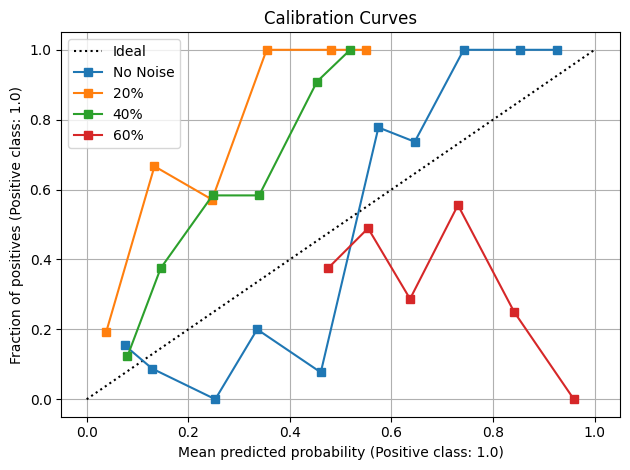

In [206]:
models = [model_lr, model_lr_20, model_lr_40, model_lr_60]
for model in models:
    CalibrationDisplay.from_estimator(model, X_test, y_test, n_bins=10, strategy='uniform', ax=plt.gca())
plt.title("Calibration Curves")
plt.grid(True)
plt.legend(['Ideal', 'No Noise', '20%', '40%', '60%'])
plt.tight_layout()
plt.show()
